**This data analysis report is completed as part of the Google Data Analytics Certificate - Capstone project. The analysis is done by following the six phases of data analysis - Ask, Prepare, Process, Analyze, Share and Act.**

**Public data source: Fitbit Fitness Tracker Data on Kaggle - https://www.kaggle.com/datasets/arashnic/fitbit **

**Since the dataset is not large, initial analysis is done in a spreadsheet program. Remaining analysis is done with R programming, to create reproducible work.**


# Business Task/ Objective:
The goal of this project is to identify growth opportunities for companyA by studying non-companyA smart devices fitness data. To understand consumer usage of smart fitness devices, this project will study the impact of workout intensity, sleep time, weekday and time of the day in identifying workout trends. The insights from the study will be applied to one of the companyA products to generate recommendations. The top 3 recommendations will guide marketing strategy for the company. 

#### Stakeholders:
1. CompanyA’s cofounder-1 and Chief Creative Officer 
2. Mathematician and CompanyA’s cofounder-2; key member of the company's executive team 
3. CompanyA's marketing analytics team
 
#### Deliverables:
1. Data visualizations to demonstrate identified trends in fitness data.
2. Top 3 recommendations to guide marketing strategy.
3. A final report with details of analysis, conclusions and recommendations.


# About the data:
The project studies a public dataset- Fitbit fitness tracker data, which is freely available on Kaggle. This quantitative data is generated by a survey of users who consented to the submission of their tracker data. The dataset is stored in csv files and is expected to be updated annually.

#### Assumptions:
1. This analysis only includes fitness data from smart devices.
2. Analysis is limited to the data provided.
3. Since the data is limited to 33 users with no information on their health or individual targets, we assume that all users have similar targets.
4. No predictions will be made on future consumer behavior.

# Clean the data:
List of files needed for analysis:
1. dailyActivity_merged.csv
2. dailyCalories_merged.csv
3. hourlyCalories_merged.csv
4. sleepDay_merged.csv
5. hourlyIntensities_merged.csv

#### Load packages needed for cleaning data

In [1]:
library(readr)     #read_csv()
library(tidyr)     #separate()
library(plyr)      #count()
library(dplyr)     #glimpse(), rename()
library(lubridate) #as.date()
library(janitor)   #clean_names()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#### 1a.  Identify what needs to be cleaned - *dailyActivity_merged.csv*
Some observations:
* ActivityDate has data type character.
* ActivityDate can be renamed to date for consistency across files.
* Column names are a mix of uppercase and lowercase characters and can be cleaned.
* Data contains no duplicates.
* Only 33 unique user ids found.

In [2]:
df_daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv", show_col_types = FALSE)
str(df_daily_activity)

spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

#### Check for duplicates:
None found

In [3]:
print("Check for duplicates:")
plyr::count(duplicated(df_daily_activity))

[1] "Check for duplicates:"


x,freq
<lgl>,<int>
FALSE,940


#### Count unique user ids:
Only 33 unique users found. This means we have data from a limited group of users.

In [4]:
print(paste("Count of unique user ids is:", n_distinct(df_daily_activity$Id)))

[1] "Count of unique user ids is: 33"


#### 1b. Clean *dailyActivity_merged.csv*
* Convert ActivityDate from character type to date.
* Rename column ActivityDate to date for consistency across files.
* Clean all column names. 
* Verify the cleaned data.

In [5]:
# convert ActivityDate from character to date.
df_daily_activity$ActivityDate <- as.Date(df_daily_activity$ActivityDate, format = "%m/%d/%Y")

# rename ActivityDate to date
df_daily_activity <- dplyr::rename(df_daily_activity, date = "ActivityDate")

# clean all column names
df_daily_activity <- clean_names(df_daily_activity)

# verify the cleaned data
glimpse(df_daily_activity)

Rows: 940
Columns: 15
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ date                       <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

#### 2a.  Identify what needs to be cleaned - *dailyCalories_merged.csv*
Some observations:
* ActivityDay has data type character.
* ActivityDay can be renamed to date for consistency across files.
* Column names are a mix of uppercase and lowercase characters and can be cleaned.
* Data contains no duplicates.
* Only 33 unique user ids found.

In [6]:
df_daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv", show_col_types = FALSE)
str(df_daily_calories)

spec_tbl_df [940 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id         : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ Calories   : num [1:940] 1985 1797 1776 1745 1863 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


#### Check for duplicates: 
None found

In [7]:
print("Check for duplicates:")
plyr::count(duplicated(df_daily_calories))

[1] "Check for duplicates:"


x,freq
<lgl>,<int>
FALSE,940


#### Count unique user ids:
Only 33 unique users found. This means we have data from a limited group of users.

In [8]:
print(paste("Count of unique user ids is:", n_distinct(df_daily_calories$Id)))

[1] "Count of unique user ids is: 33"


#### 2b. Clean *dailyCalories_merged.csv*
* Convert ActivityDay from character type to date.
* Rename column ActivityDay to date for consistency across files.
* Clean all column names.
* Verify the cleaned data.

In [9]:
# convert ActivityDay from character to date.
df_daily_calories$ActivityDay <- as.Date(df_daily_calories$ActivityDay, format = "%m/%d/%Y")

# rename ActivityDay to date
df_daily_calories <- dplyr::rename(df_daily_calories, date = "ActivityDay")

# clean all column names
df_daily_calories <- clean_names(df_daily_calories)

# verify the cleaned data
head(df_daily_calories)

id,date,calories
<dbl>,<date>,<dbl>
1503960366,2016-04-12,1985
1503960366,2016-04-13,1797
1503960366,2016-04-14,1776
1503960366,2016-04-15,1745
1503960366,2016-04-16,1863
1503960366,2016-04-17,1728


#### 3a.  Identify what needs to be cleaned - *hourlyCalories_merged.csv*
Some observations:
* ActivityHour has date and time information merged together.
* ActivityHour has data type character.
* Column names are a mix of uppercase and lowercase characters and can be cleaned.
* Data contains no duplicates.
* Only 33 unique user ids found.

In [10]:
df_hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv", show_col_types = FALSE)
str(df_hourly_calories)

spec_tbl_df [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


#### Check for duplicates: 
None found

In [11]:
print("Check for duplicates:")
plyr::count(duplicated(df_hourly_calories))

[1] "Check for duplicates:"


x,freq
<lgl>,<int>
FALSE,22099


#### Count unique user ids:
Only 33 unique users found. This means we have data from a limited group of users.

In [12]:
print(paste("Count of unique user ids is:", n_distinct(df_hourly_calories$Id)))

[1] "Count of unique user ids is: 33"


#### 3b. Clean *hourlyCalories_merged.csv*
* Split column ActivityHour into date and time.
* Convert ActivityHour from character type to date.
* Filter records with incorrect time formats- '0:00:00 PM', ':00:00 PM' and ':00:00 AM'.
* Convert time '0:00:00 AM' to '12:00:00 AM' for consistency.
* Clean all column names.
* Verify the cleaned data.

In [13]:
# split ActivityHour into date and time
df_hourly_calories <- separate(df_hourly_calories, ActivityHour, into = c("date","time"), sep = 10)

# convert date column from character type to date
df_hourly_calories$date <- as.Date(df_hourly_calories$date, format = "%m/%d/%Y")

# trim leading and trailing whitespaces from time column
# filter out time strings with incorrect formats
# convert 0:00:00 AM to 12:00:00 AM to match other 12:00:00 AM entries in time column
df_hourly_calories$time <- trimws(df_hourly_calories$time, which = c("both")) 
df_hourly_calories <- df_hourly_calories %>% filter(!time %in% c("0:00:00 PM", ":00:00 PM", ":00:00 AM"))
df_hourly_calories["time"][df_hourly_calories["time"] == "0:00:00 AM"] <- "12:00:00 AM"

# clean all column names
df_hourly_calories <- clean_names(df_hourly_calories)

# verify the cleaned data
head(df_hourly_calories)

id,date,time,calories
<dbl>,<date>,<chr>,<dbl>
1503960366,2016-04-12,12:00:00 AM,81
1503960366,2016-04-12,1:00:00 AM,61
1503960366,2016-04-12,2:00:00 AM,59
1503960366,2016-04-12,3:00:00 AM,47
1503960366,2016-04-12,4:00:00 AM,48
1503960366,2016-04-12,5:00:00 AM,48


#### 4a.  Identify what needs to be cleaned - *sleepDay_merged.csv*
Some observations:
* SleepDay has date and time information merged together.
* SleepDay has data type character.
* Column names are a mix of uppercase and lowercase characters and can be cleaned.
* Data contains 3 duplicates.
* Only 24 unique user ids found.

In [14]:
df_sleepday <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv", show_col_types = FALSE)
str(df_sleepday)

spec_tbl_df [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


#### Check for duplicates: 
Three duplicate records found.

In [15]:
print("Check for duplicates:")
plyr::count(duplicated(df_sleepday))

[1] "Check for duplicates:"


x,freq
<lgl>,<int>
FALSE,410
TRUE,3


#### Count unique user ids:
Only 24 unique users found. This means we have data from a limited group of users.

In [16]:
print(paste("Count of unique user ids is:", n_distinct(df_sleepday$Id)))

[1] "Count of unique user ids is: 24"


#### 4b. Clean *sleepDay_merged.csv*
* Split column SleepDay into date and time.
* Convert SleepDay from character type to date.
* Remove duplicate records.
* Clean all column names.
* Verify the cleaned data.

In [17]:
# split SleepDay into date and time
df_sleepday <- separate(df_sleepday, SleepDay, into = c("date","time"), sep = 10)

# convert date column from character type to date
df_sleepday$date <- as.Date(df_sleepday$date, format = "%m/%d/%Y")

# remove duplicate records
df_sleepday <- unique(df_sleepday)

# clean all column names
df_sleepday <- clean_names(df_sleepday)

# verify the cleaned data
print(paste("Total nunber of records:", nrow(df_sleepday)))
head(df_sleepday)


[1] "Total nunber of records: 410"


id,date,time,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,12:00:00 AM,1,327,346
1503960366,2016-04-13,12:00:00 AM,2,384,407
1503960366,2016-04-15,12:00:00 AM,1,412,442
1503960366,2016-04-16,12:00:00 AM,2,340,367
1503960366,2016-04-17,12:00:00 AM,1,700,712
1503960366,2016-04-19,12:00:00 AM,1,304,320


#### 5a. Identify what needs to be cleaned - *hourlyIntensities_merged.csv*
Some observations:
* ActivityHour has date and time information merged together.
* ActivityHour has data type character.
* Column names are a mix of uppercase and lowercase characters and can be cleaned.
* Data contains no duplicates.
* Only 33 unique user ids found.

In [18]:
df_hourly_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv", show_col_types = FALSE)
str(df_hourly_intensities)

spec_tbl_df [22,099 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id              : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : num [1:22099] 20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num [1:22099] 0.333 0.133 0.117 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   TotalIntensity = col_double(),
  ..   AverageIntensity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


#### Check for duplicates: 
None found

In [19]:
print("Check for duplicates:")
plyr::count(duplicated(df_hourly_intensities))

[1] "Check for duplicates:"


x,freq
<lgl>,<int>
FALSE,22099


#### Count unique user ids:
Only 33 unique users found. This means we have data from a limited group of users.

In [20]:
print(paste("Count of unique user ids is:", n_distinct(df_hourly_intensities$Id)))

[1] "Count of unique user ids is: 33"


#### 5b. Clean *hourlyIntensities_merged.csv*
* Split column ActivityHour into date and time.
* Convert ActivityHour from character type to date.
* Clean all column names.
* Verify the cleaned data.

In [21]:
# split ActivityHour into date and time
df_hourly_intensities <- separate(df_hourly_intensities, ActivityHour, into = c("date","time"), sep = 10)

# convert date column from character type to date
df_hourly_intensities$date <- as.Date(df_hourly_intensities$date, format = "%m/%d/%Y")

# clean all column names
df_hourly_intensities <- clean_names(df_hourly_intensities)

# verify the cleaned data
head(df_hourly_intensities)

id,date,time,total_intensity,average_intensity
<dbl>,<date>,<chr>,<dbl>,<dbl>
1503960366,2016-04-12,12:00:00 AM,20,0.333333
1503960366,2016-04-12,1:00:00 AM,8,0.133333
1503960366,2016-04-12,2:00:00 AM,7,0.116667
1503960366,2016-04-12,3:00:00 AM,0,0.000000
1503960366,2016-04-12,4:00:00 AM,0,0.000000
1503960366,2016-04-12,5:00:00 AM,0,0.000000



# Analyze the data:
#### **Note:**
Since the dataset here is not large, initial analysis is done in a spreadsheet program. Pivot tables helped to analyze and visualize data- Graph-1, Graph-2 and Graph-3.

Remaining analysis is done with R programming, to create reproducible work.

#### Graph-1: Time distribution on various workout intensities
On analyzing the time spent on various workout intensities, it can be concluded that most time is spent sedentary. And users spend the second highest amount of time on lightly intense workouts.

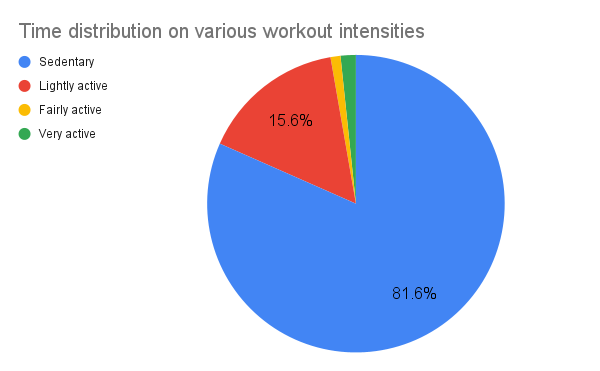

                                        Graph-1

#### Graph2: UserId vs Average calories
Analyze average calories spent by each user. Graph-2 shows that most users spend calories less than the overall average for all users.

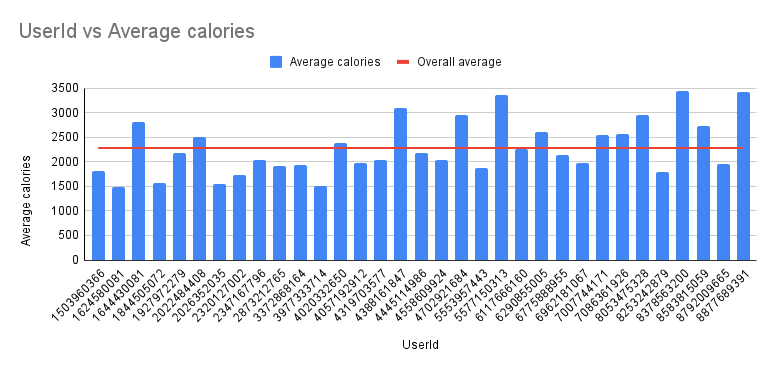

                                            Graph-2

#### Graph-3: UserId vs Average steps
Analyze average steps taken by each user. Graph-3 shows that most users take steps less than the overall average for all users.

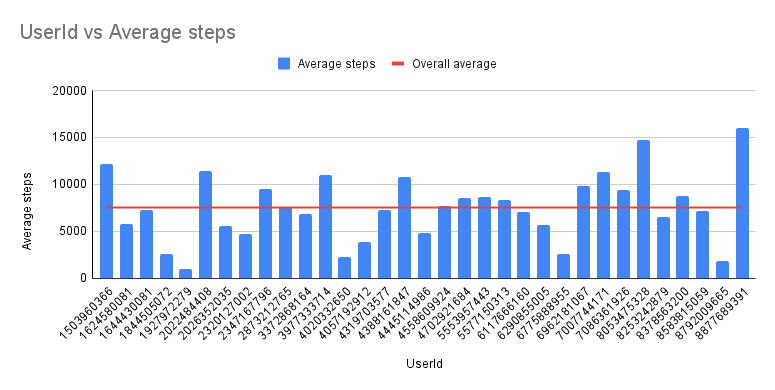

                                            Graph-3

#### Load packages needed for plotting graphs in R

In [22]:
library(tidyverse)  #ggplot2
library(repr)       #resize plots

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ stringr 1.4.0
✔ tibble  3.1.7     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()         masks plyr::arrange()
✖ lubridate::as.difftime() masks base::as.difftime()
✖ purrr::compact()         masks plyr::compact()
✖ dplyr::count()           masks plyr::count()
✖ lubridate::date()        masks base::date()
✖ dplyr::failwith()        masks plyr::failwith()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::id()              masks plyr::id()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr::mutate()          masks plyr::mutate()
✖ dplyr::rename()          masks plyr::rename()
✖ lubridate::setdiff()     masks base::setdiff()
✖ dplyr::summarise()       masks plyr::summarise()
✖ dplyr::summarize()       masks plyr::summarize()
✖ lubridate:

#### Graph4: Weekday vs Calories
Analyze average calories burnt on each weekday. Graph4 shows that fewer calories are burnt on Thursday and Sunday as compared to other days.

In [23]:
df_daily_activity$weekday <- weekdays(df_daily_activity$date)
glimpse(df_daily_activity)

Rows: 940
Columns: 16
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ date                       <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

In [24]:
df_daily_activity_summary <- df_daily_activity %>%
group_by(weekday) %>%
summarize(calories = round(mean(calories),2), steps = round(mean(total_steps),2))
df_daily_activity_summary

weekday,calories,steps
<chr>,<dbl>,<dbl>
Friday,2331.79,7448.23
Monday,2324.21,7780.87
Saturday,2354.97,8152.98
Sunday,2263.00,6933.23
Thursday,2199.57,7405.84
Tuesday,2356.01,8125.01
Wednesday,2302.62,7559.37


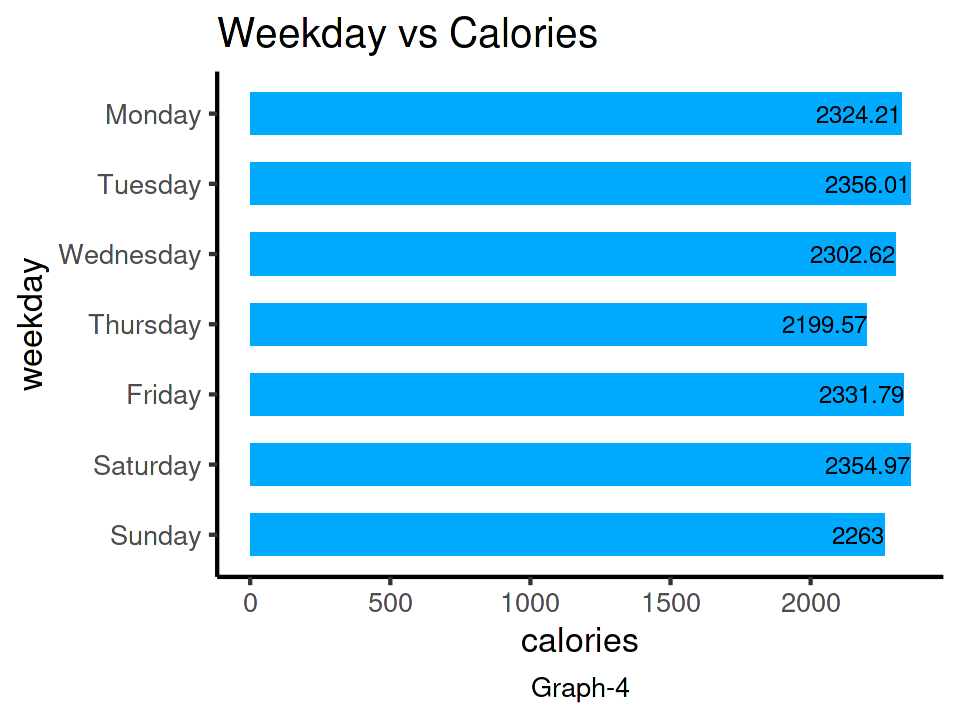

In [25]:
graph4 <- ggplot(data = df_daily_activity_summary, aes(x = calories, y = weekday, label = calories)) + 
geom_col(width = 0.6, fill = "#00abff") +
geom_text(hjust = 1, size = 5) +
scale_y_discrete(limits = c("Sunday","Saturday","Friday","Thursday","Wednesday","Tuesday","Monday")) +
labs(title = "Weekday vs Calories", caption = "Graph-4") +
theme_classic(base_size = 20) +
theme(plot.caption = element_text(hjust = 0.5)) 

options(repr.plot.width = 8, repr.plot.height = 6)
graph4

#### Graph5: Weekday vs Steps
Analyze average steps taken on each weekday. Graph-5 shows that Sunday has the least average steps.

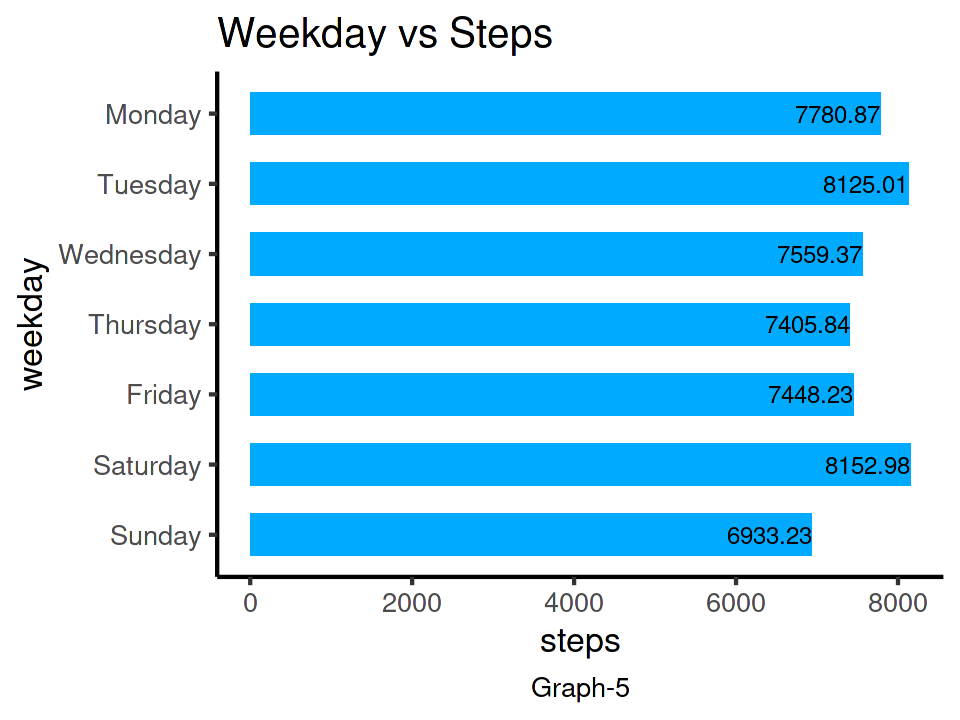

In [26]:
graph5 <- ggplot(data = df_daily_activity_summary, aes(x = steps, y = weekday, label = steps)) + 
geom_col(width = 0.6,fill = "#00abff") +
geom_text(vjust = "center", size = 5, hjust = 1) +
scale_y_discrete(limits = c("Sunday","Saturday","Friday","Thursday","Wednesday","Tuesday","Monday")) +
labs(title = "Weekday vs Steps", caption = "Graph-5") +
theme_classic(base_size = 20) +
theme(plot.caption = element_text(hjust = 0.5)) 

options(repr.plot.width = 8, repr.plot.height = 6)
graph5

#### Graph-6: Sleep time vs Calories
Analyze the relationship between sleep time and calories burnt. Graph-6 shows that users whose sleep time is much higher than the overall average burn lesser calories.

In [27]:
df_sleepday_daily_calories <- merge(df_sleepday, df_daily_calories, by = c("id","date"))
head(df_sleepday_daily_calories)

,id,date,time,total_sleep_records,total_minutes_asleep,total_time_in_bed,calories
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,12:00:00 AM,1,327,346,1985
2,1503960366,2016-04-13,12:00:00 AM,2,384,407,1797
3,1503960366,2016-04-15,12:00:00 AM,1,412,442,1745
4,1503960366,2016-04-16,12:00:00 AM,2,340,367,1863
5,1503960366,2016-04-17,12:00:00 AM,1,700,712,1728
6,1503960366,2016-04-19,12:00:00 AM,1,304,320,2035


#### Average sleep time of users:
419.17 minutes

In [28]:
print(paste("Average sleep time of users in minutes: ", round(mean(df_sleepday_daily_calories$total_minutes_asleep),2)))

[1] "Average sleep time of users in minutes:  419.17"


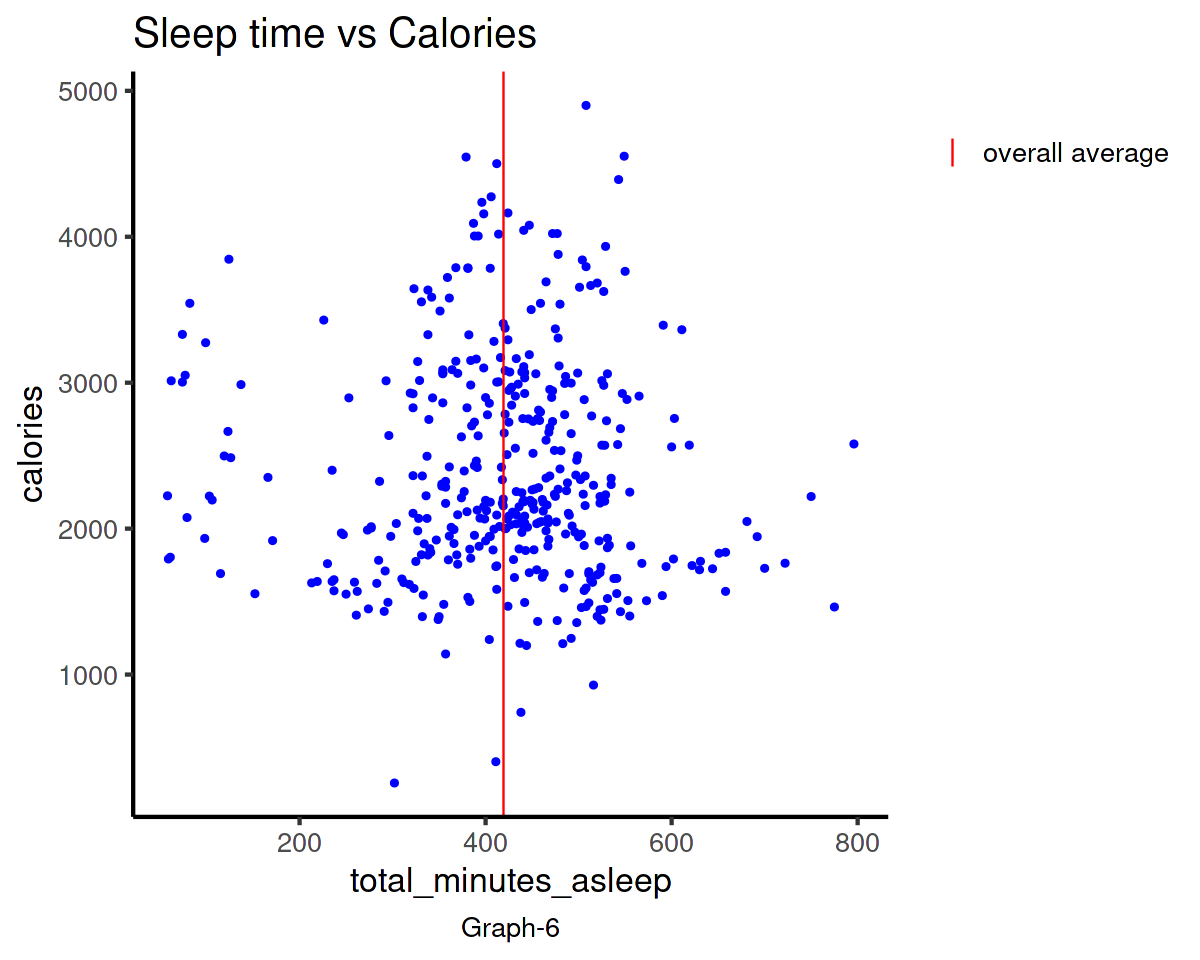

In [29]:
graph6 <- ggplot(data = df_sleepday_daily_calories, aes(x = total_minutes_asleep, y = calories)) + 
geom_point(color = "blue") +
geom_vline(aes(xintercept = round(mean(total_minutes_asleep),2), color = "overall average")) +
scale_color_manual(name = "", values = c("overall average" = "red")) + 
labs(title = "Sleep time vs Calories", caption = "Graph-6") +
theme_classic(base_size = 20) +
theme(plot.caption = element_text(hjust = 0.5), legend.justification = "top") 

options(repr.plot.width = 10, repr.plot.height = 8)
graph6

#### Graph-7: Workout intensity vs Calories
Analyze the relationship between workout intensity and calories burnt. Graph-7 shows that there is a positive correlation between workout intensity and calories. This means that higher the workout intensity, more the calories burnt.

Since the second highest time is spent on lightly active workouts (Graph-1 pie chart), most Graph-7 data points fall under workout intensity = 1, which represents lightly active workouts.

In [30]:
df_intensities_calories <- merge(df_hourly_intensities, df_hourly_calories, by = c("id", "date", "time"))
head(df_intensities_calories)

,id,date,time,total_intensity,average_intensity,calories
,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,1:00:00 AM,8,0.133333,61
2,1503960366,2016-04-12,1:00:00 PM,6,0.100000,66
3,1503960366,2016-04-12,10:00:00 AM,29,0.483333,99
4,1503960366,2016-04-12,10:00:00 PM,9,0.150000,65
5,1503960366,2016-04-12,11:00:00 AM,12,0.200000,76
6,1503960366,2016-04-12,11:00:00 PM,21,0.350000,81


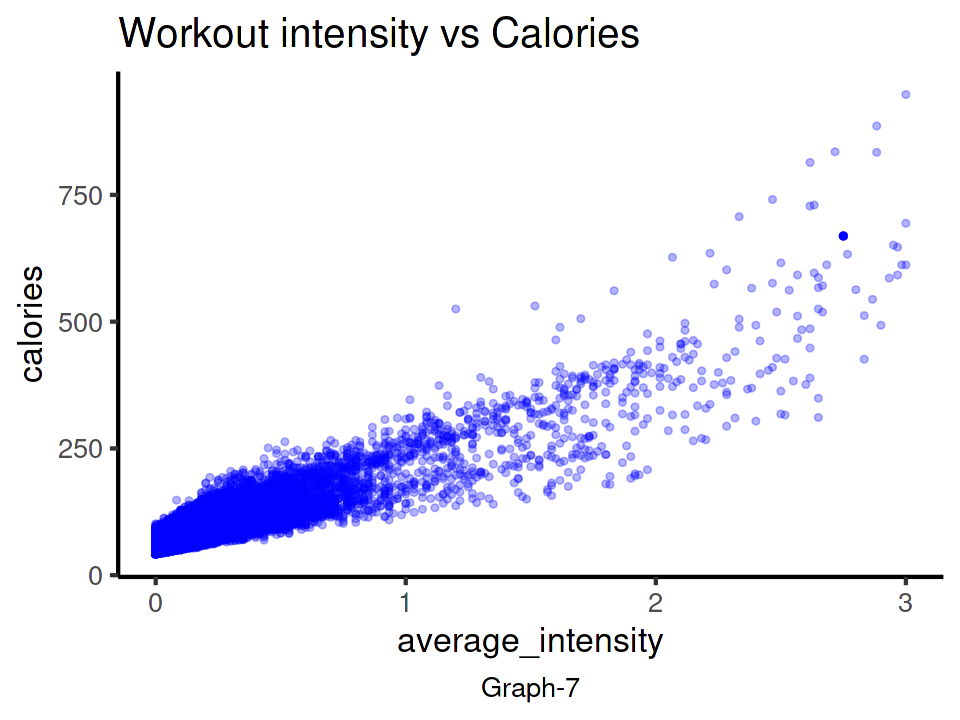

In [31]:
graph7 <- ggplot(data = df_intensities_calories, aes(x = average_intensity, y = calories)) + 
geom_point(color = "blue", alpha = 0.3) +
labs(title="Workout intensity vs Calories", caption = "Graph-7") +
theme_classic(base_size = 20) +
theme(plot.caption = element_text(hjust = 0.5))

options(repr.plot.width = 8, repr.plot.height = 6)
graph7

#### Graph-8: Time of day vs Average calories
Analyze the relationship between time of day and average calories burnt. Graph-8 shows that the highest number of calories are burnt between 12 PM - 7 PM, which could mean that people workout the most during this time range.

In [32]:
df_summary_calories <- df_hourly_calories %>%
group_by(time) %>%
summarize(calories = round(mean(calories),2))
head(df_summary_calories)

time,calories
<chr>,<dbl>
1:00:00 AM,79.51
1:00:00 PM,106.23
10:00:00 AM,108.99
10:00:00 PM,87.65
11:00:00 AM,111.59
11:00:00 PM,77.30


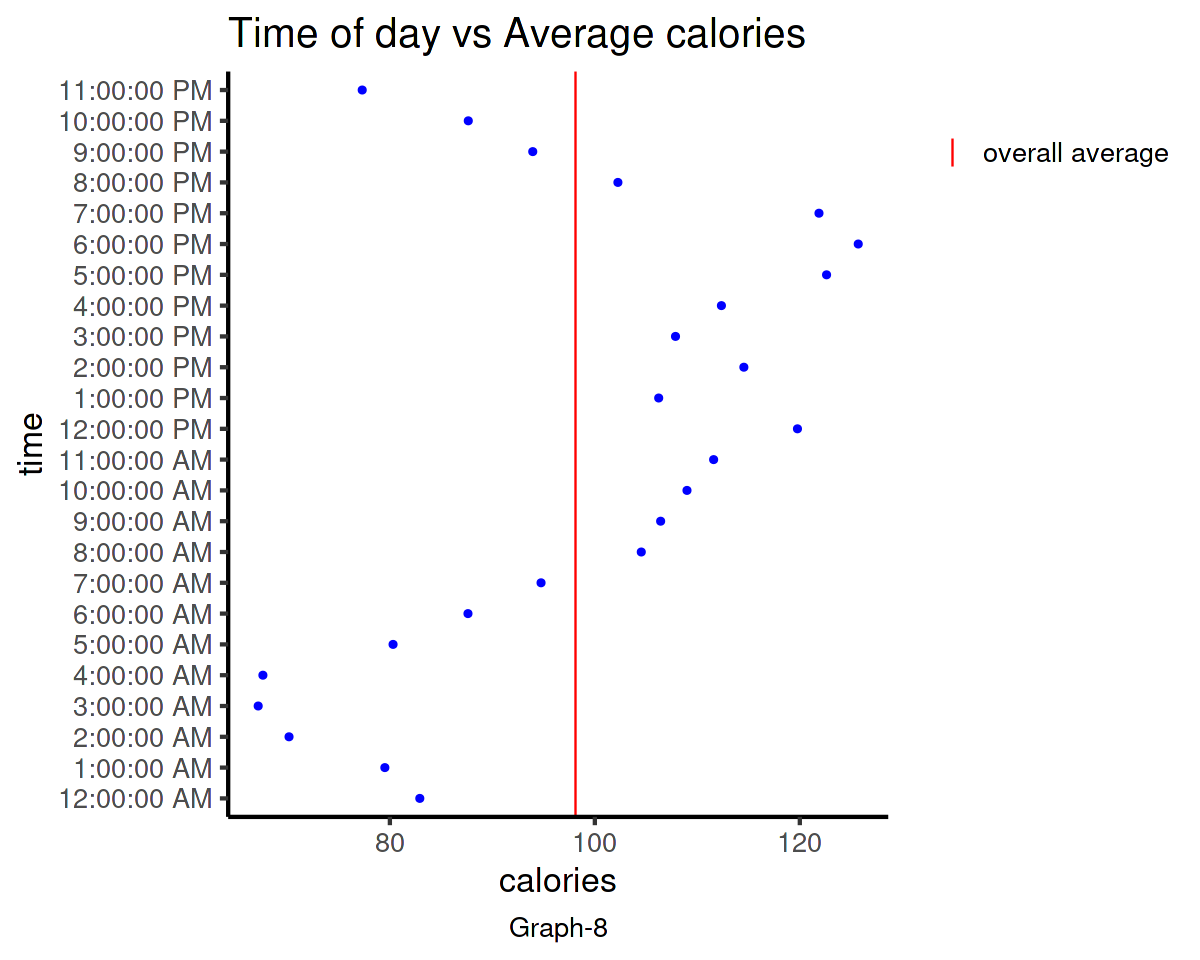

In [33]:
graph8 <- ggplot(data = df_summary_calories, aes(y = time, x = calories)) +
geom_point(color = "blue") + 
geom_vline(aes(xintercept = round(mean(calories),2), color = "overall average")) +
scale_color_manual(name = "", values = c("overall average" = "red")) + 
scale_y_discrete(limits = c("12:00:00 AM", "1:00:00 AM", "2:00:00 AM", "3:00:00 AM", "4:00:00 AM", "5:00:00 AM",
                            "6:00:00 AM", "7:00:00 AM", "8:00:00 AM", "9:00:00 AM", "10:00:00 AM", "11:00:00 AM",
                            "12:00:00 PM", "1:00:00 PM", "2:00:00 PM", "3:00:00 PM", "4:00:00 PM", "5:00:00 PM", 
                            "6:00:00 PM", "7:00:00 PM", "8:00:00 PM", "9:00:00 PM", "10:00:00 PM", "11:00:00 PM") ) +
labs(title = "Time of day vs Average calories", caption = "Graph-8") +
theme_classic(base_size = 20) +
theme(plot.caption = element_text(hjust = 0.5), legend.justification = "top")

options(repr.plot.width = 10, repr.plot.height = 8)
graph8

# Recommendations:
Based on this analysis, following recommendations can guide the marketing strategy:

1. Target consumers who prefer low intensity workouts. Taylor ads to reach consumers who workout in 12 PM-7 PM time frame (Graph-1, Graph-8).

2. Motivate consumers to work-out on Thursdays and Sundays by sending periodic updates on their health targets on these days (Graph-4, Graph-5). 

3. For consumers whose sleep time is much higher than the overall average, send reminders that it could be affecting their ability to reach set targets (Graph-6).

# Future steps:
The data in this analysis was limited to 33 users. Gather more data about users, their health and goals. This could lead to more insights on consumer usage of smart fitness devices. 